<div style="font-weight:bold;font-size:200%">How matplotlib's widget backend handles figure objects</div><br>

This notebook demonstrates how the `inline` backend of `matplotlib` handles the "implicit" figure
across cells.

Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html:

> **Notes**
>
> ----
> **Saving figures to file and showing a window at the same time**
>
> If you want an image file as well as a user interface window, use
> [pyplot.savefig](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html#matplotlib.pyplot.savefig)
> before
> [pyplot.show](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html#matplotlib.pyplot.show).
> At the end of (a blocking) `show()` the figure is closed and thus unregistered from pyplot. Calling
> [pyplot.savefig](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html#matplotlib.pyplot.savefig)
> afterwards would save a new and thus empty figure. This limitation of command order does not apply
> if the show is non-blocking or if you keep a reference to the figure and use
> [Figure.savefig](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.savefig).
>
>
>
>
> **Auto-show in jupyter notebooks**
>
>The jupyter backends (activated via `%matplotlib inline`, `%matplotlib notebook`, or
> `%matplotlib widget`), call `show()` at the end of every cell by default. Thus, you usually don't
> have to call it explicitly there.

<br>

**Dependencies:**

- `%autoreload 3` => `ipython>=8.*`
- colored prints => `rich` (optional)

In [ ]:
%matplotlib widget
%load_ext autoreload
%autoreload 3
%config IPythonBackend.figure_format = 'retina'


import matplotlib.pyplot as plt
import numpy as np

try:
    import rich

    rich.reconfigure(force_terminal=True, force_jupyter=False)
    rich.pretty.install()
    print = rich.get_console().out
except:
    pass

# End-of-cell does not clear figure objects

The documentation states that `plt.show()` displays all open figures, after which all are closed and
unregistered from pyplot. **However, we can see that with this is not the case with `%matplotlib
widget`**.

FRESH_STATE: [] []
STATE: [1] ['']
STATE: [1, 2] ['', '']
<Figure size 640x480 with 1 Axes>


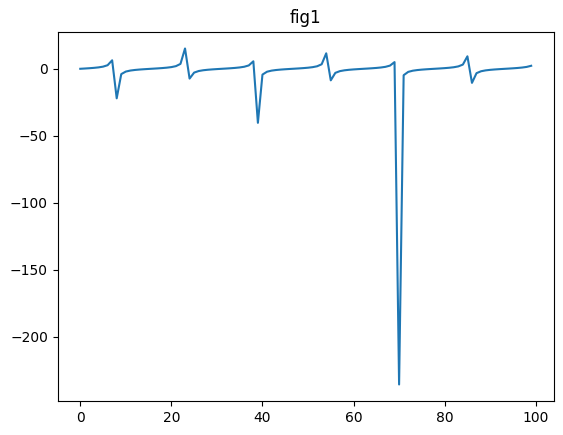

<Figure size 640x480 with 1 Axes>


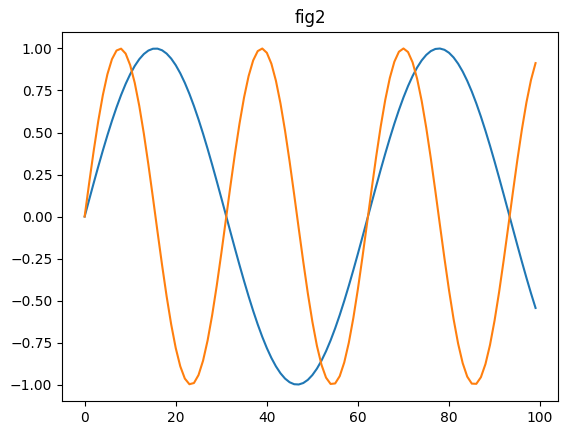

In [ ]:
for i in plt.get_fignums():
    plt.close(i)

print("FRESH_STATE:", plt.get_fignums(), plt.get_figlabels())

with plt.ioff():
    fig1 = plt.gcf()
    plt.title("fig1")
    plt.plot(np.tan(np.linspace(0, 20, 100)))
    print("STATE:", plt.get_fignums(), plt.get_figlabels())

    fig2 = plt.figure()
    plt.title("fig2")
    plt.plot(np.sin(np.linspace(0, 10, 100)))
    plt.plot(np.sin(np.linspace(0, 20, 100)))
    print("STATE:", plt.get_fignums(), plt.get_figlabels())

    display(fig1, fig2)

DIRTY_STATE_OF_NEW_CELL: [1, 2] ['', '']
<Figure size 640x480 with 1 Axes>


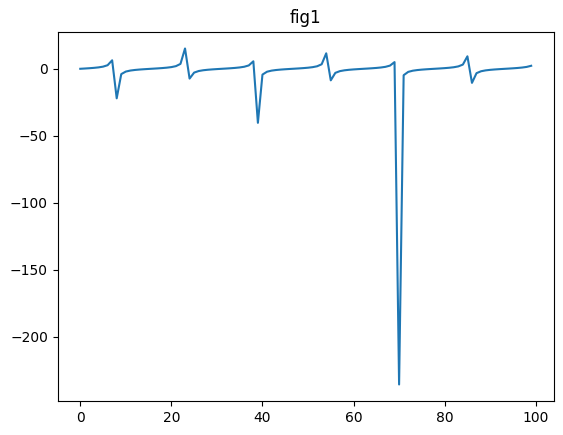

<Figure size 640x480 with 1 Axes>


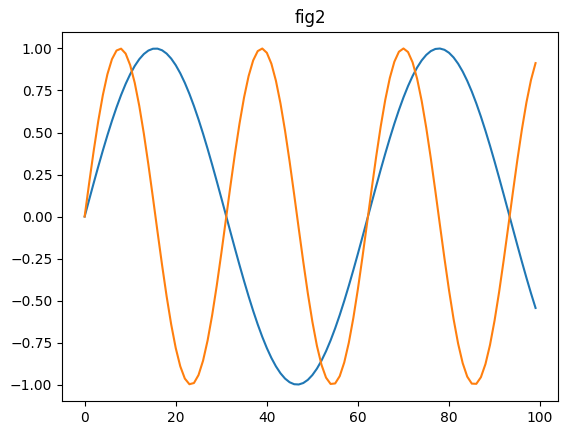

In [ ]:
print("DIRTY_STATE_OF_NEW_CELL:", plt.get_fignums(), plt.get_figlabels())
display(*(plt.figure(i) for i in plt.get_fignums()))

# `plt.show()` does not clears figure object when interactive is on

FRESH_STATE: [] []
STATE: [1] ['']


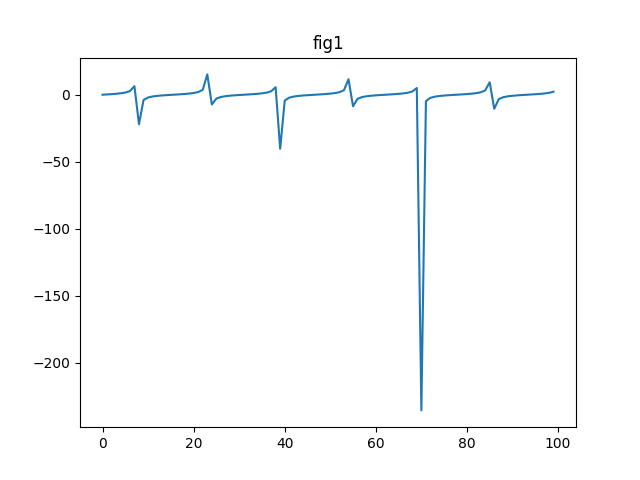

STATE: [1, 2] ['', '']


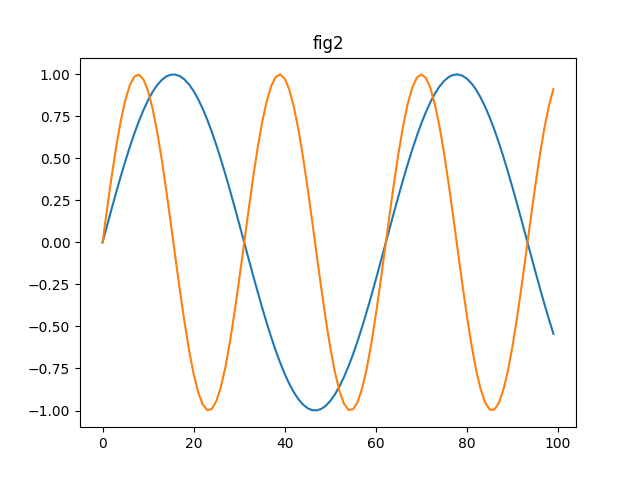

In [ ]:
for i in plt.get_fignums():
    plt.close(i)

print("FRESH_STATE:", plt.get_fignums(), plt.get_figlabels())

fig1 = plt.gcf()
plt.title("fig1")
plt.plot(np.tan(np.linspace(0, 20, 100)))
print("STATE:", plt.get_fignums(), plt.get_figlabels())
plt.show()

fig2 = plt.figure()
plt.title("fig2")
plt.plot(np.sin(np.linspace(0, 10, 100)))
plt.plot(np.sin(np.linspace(0, 20, 100)))
print("STATE:", plt.get_fignums(), plt.get_figlabels())
plt.show()

In [ ]:
print("STATE_OF_NEW_CELL:", plt.get_fignums(), plt.get_figlabels())

STATE_OF_NEW_CELL: [1, 2] ['', '']


# `plt.show()` shows and clears only the previous plot when interactive is off

FRESH_STATE: [] []
STATE: [1] ['']
STATE: [1, 2] ['', '']


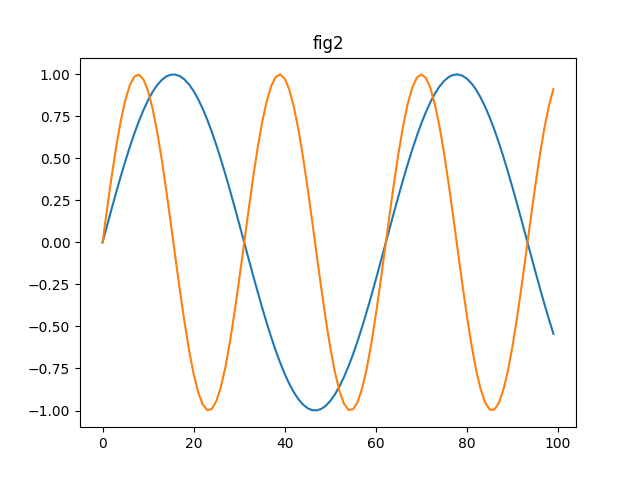

In [ ]:
for i in plt.get_fignums():
    plt.close(i)

print("FRESH_STATE:", plt.get_fignums(), plt.get_figlabels())

with plt.ioff():
    fig1 = plt.gcf()
    plt.title("fig1")
    plt.plot(np.tan(np.linspace(0, 20, 100)))
    print("STATE:", plt.get_fignums(), plt.get_figlabels())

    fig2 = plt.figure()
    plt.title("fig2")
    plt.plot(np.sin(np.linspace(0, 10, 100)))
    plt.plot(np.sin(np.linspace(0, 20, 100)))
    print("STATE:", plt.get_fignums(), plt.get_figlabels())
    plt.show()

In [ ]:
print("STATE_OF_NEW_CELL:", plt.get_fignums(), plt.get_figlabels())

STATE_OF_NEW_CELL: [1] ['']


# Combine `plt.ioff()` and multiple `plt.show()`

FRESH_STATE: [] []
STATE: [1] ['']


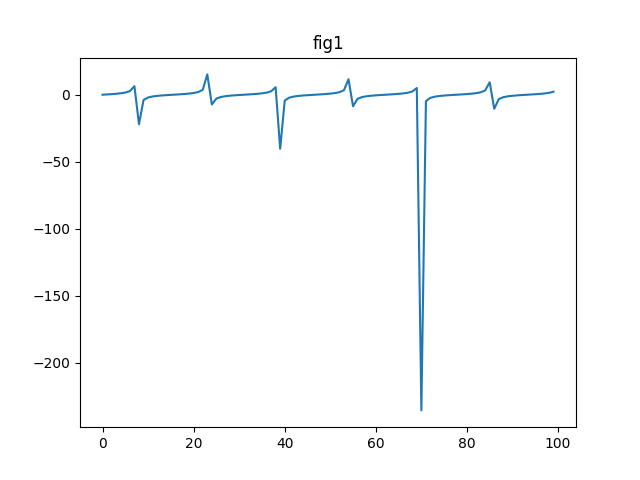

STATE: [1] ['']


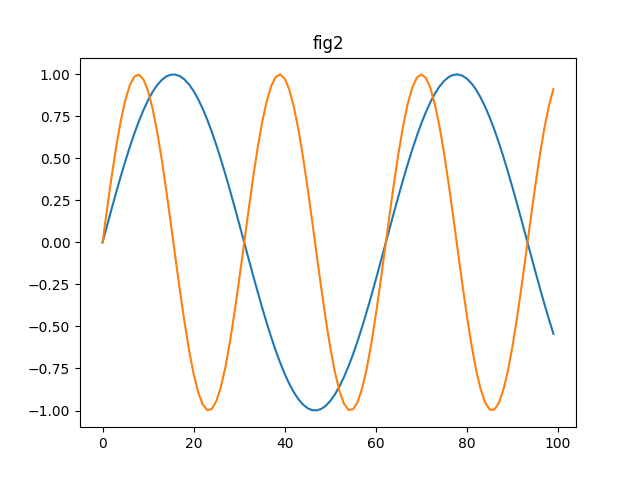

In [ ]:
for i in plt.get_fignums():
    plt.close(i)

print("FRESH_STATE:", plt.get_fignums(), plt.get_figlabels())

with plt.ioff():
    fig1 = plt.gcf()
    plt.title("fig1")
    plt.plot(np.tan(np.linspace(0, 20, 100)))
    print("STATE:", plt.get_fignums(), plt.get_figlabels())
    plt.show()

    fig2 = plt.figure()
    plt.title("fig2")
    plt.plot(np.sin(np.linspace(0, 10, 100)))
    plt.plot(np.sin(np.linspace(0, 20, 100)))
    print("STATE:", plt.get_fignums(), plt.get_figlabels())
    plt.show()

In [ ]:
print("STATE_OF_NEW_CELL:", plt.get_fignums(), plt.get_figlabels())

STATE_OF_NEW_CELL: [] []


# Clear everything, and see above plots

In [ ]:
for i in plt.get_fignums():
    plt.close(i)

print("FRESH_STATE:", plt.get_fignums(), plt.get_figlabels())

FRESH_STATE: [] []
